In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

## load data from Github into new frame and remove rows with absent data ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/df-combined.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')
    
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH  Brent  NBP_UK  GBP-USD       NBP
1    2009-01-02  74.35  81.00  46.17  5.41  46.91   54.74   1.4453  7.911572
4    2009-01-05  77.65  84.40  48.61  5.83  49.62   56.66   1.4708  8.333553
5    2009-01-06  81.25  88.50  48.56  6.10  50.53   59.88   1.4919  8.933497
6    2009-01-07  78.65  86.25  42.75  5.89  45.86   58.03   1.5111  8.768913
7    2009-01-08  79.15  84.00  41.68  5.96  44.67   55.74   1.5202  8.473595
...         ...    ...    ...    ...   ...    ...     ...      ...       ...
4254 2020-08-25  49.75  48.90  43.17  2.54  45.86   24.61   1.3148  3.235723
4255 2020-08-26  49.70  48.95  43.21  2.52  45.64   25.10   1.3193  3.311443
4256 2020-08-27  49.80  48.90  42.88  2.52  45.09   26.68   1.3206  3.523361
4257 2020-08-28  50.60  52.20  42.96  2.46  45.81   28.95   1.3344  3.863088
4260 2020-08-31  51.95  52.90  42.61  2.30  45.28   28.95   1.3379  3.873220

[2856 rows x 9 columns]


In [2]:
## price return calculations ##

for col in df.columns[1:9]:
    df[col+'_r'] = (df[col].pct_change())*100
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH  Brent  NBP_UK  GBP-USD       NBP  \
4    2009-01-05  77.65  84.40  48.61  5.83  49.62   56.66   1.4708  8.333553   
5    2009-01-06  81.25  88.50  48.56  6.10  50.53   59.88   1.4919  8.933497   
6    2009-01-07  78.65  86.25  42.75  5.89  45.86   58.03   1.5111  8.768913   
7    2009-01-08  79.15  84.00  41.68  5.96  44.67   55.74   1.5202  8.473595   
8    2009-01-09  76.90  83.50  40.69  5.60  44.42   56.42   1.5111  8.525626   
...         ...    ...    ...    ...   ...    ...     ...      ...       ...   
4254 2020-08-25  49.75  48.90  43.17  2.54  45.86   24.61   1.3148  3.235723   
4255 2020-08-26  49.70  48.95  43.21  2.52  45.64   25.10   1.3193  3.311443   
4256 2020-08-27  49.80  48.90  42.88  2.52  45.09   26.68   1.3206  3.523361   
4257 2020-08-28  50.60  52.20  42.96  2.46  45.81   28.95   1.3344  3.863088   
4260 2020-08-31  51.95  52.90  42.61  2.30  45.28   28.95   1.3379  3.873220   

         NCF_r     RCF_r      WTI_r    

In [10]:
## markov regime switching for univariate analysis ##

mod = sm.tsa.MarkovRegression(df["NCF_r"], k_regimes=4, order=10, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  NCF_r   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood               -3367.914
Date:                Thu, 25 Mar 2021   AIC                           6775.828
Time:                        13:08:53   BIC                           6894.965
Sample:                             0   HQIC                          6818.790
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0084      0.008     -1.020      0.308      -0.025       0.008
sigma2         0.0156      0.003      4.622      0.000       0.009       0.022
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0405      0.017     -2.379      0.017      -0.074      -0.007
sigma2         0.2532      0.024     10.480      0.000       0.206       0.301
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0323      0.056      0.580      0.562      -0.077       0.142
sigma2         1.8574      0.277      6.701      0.000       1.314       2.401
                             Regime 3 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3608      0.711      0.507      0.612      -1.033       1.755
sigma2        47.1431     10.564      4.462      0.000      26.437      67.849
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.6601      0.052     12.652      0.000       0.558       0.762
p[1->0]        0.1187      0.021      5.574      0.000       0.077       0.160
p[2->0]        0.0008      0.019      0.039      0.969      -0.037       0.038
p[3->0]        0.0209      0.050      0.416      0.677      -0.078       0.119
p[0->1]        0.1653      0.054      3.059      0.002       0.059       0.271
p[1->1]        0.8190      0.024     33.680      0.000       0.771       0.867
p[2->1]        0.1898      0.041      4.587      0.000       0.109       0.271
p[3->1]        0.0915      0.087      1.057      0.291      -0.078       0.261
p[0->2]        0.1239      0.038      3.285      0.001       0.050       0.198
p[1->2]        0.0431      0.021      2.019      0.043       0.001       0.085
p[2->2]        0.8050      0.037     22.013      0.000       0.733       0.877
p[3->2]        0.4475      0.104      4.316      0.000       0.244       0.651
==============================================================================

W

<AxesSubplot:title={'center':'Probability of being in the low regime'}>

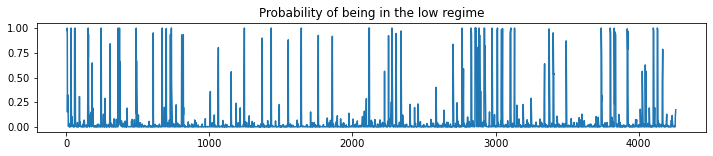

In [8]:
res_mod.filtered_marginal_probabilities[2].plot(
    title='Probability of being in the low regime', figsize=(12,2))